# <h1><center>Pre-Modeling: Data Exploration, Preprocessing and Visualization with Python</center></h1>
A | B
- | -
![Preprocessing](img/giphy.gif) | ![Preprocessing](img/1.png) 

# Steps in Data Science Project

# A. Data Gathering:

* Depending on the scope of study, data gathering may be done using several devices. 
* The data may reside in one place or many different places
* Aggregate all the sparsed data into a single data file and store in a readable format.


# B. Data Structure Understanding

The 5Vs characteristics of data that must be well understood by a data scientist are:
* Volume: The size of data that has been created from all the sources.
* Velocity: The speed at which data is generated, stored, analysed and processed. 
* Variety: The different types of data being generated mainly for structured data. 
* Variability: How the structure and meaning of data constantly changes
* Value: The possible advantage the data can offer a business based on good its analysis

# C. Data Quality Check

* Running summary statistics on all variables also helps identify data entry problems.
    * Unusual data values,unusual types, missing values
* Relationship Exploration using boxplot, scatterplot, correlation– graph it, explore it


# D. Data Transformation and Enrichment

Finding solutions to problems identified in (C) through
* Convertion of data types
* Cleaning of data by filling or dropping  null 

## Lets Practice!!!

The dataset used for this experimentation was originally downloaded from https://www.kaggle.com/joniarroba/noshowappointments. Later, slight adjustment was made to the dataset to suit the presentation need.

**Context**

A person makes a doctor appointment, receives all the instructions yet absent on the appointment day, Who to blame? 
Does receiving all necessary information guarantee patients' presense or absence on apointment days?


## Import Modules 

In [2]:
#Import Basic Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Load Dataset
* Load the dataset into a pandas dataframe 

In [3]:
df = pd.read_csv('Medical_Appointment.csv')

Info about data:
* PatientId: ID of patients
* AppointmentID: ID of appointment
* Gender: Gender of patients
* ScheduledDay: The day which the appointment was scheduled
* AppointmentDay: The day which appointment will occur
* Age: Age of the patient
* Neighbourhood: The place where hospital is located
* Scholarship: If the patient has scholarship or not
* Hypertension: If the patient has Hypertension or not
* Diabetes: If the patient has Diabetes or not
* Alcoholism: If like taking Alcohol or not
* Handcap: If the patient is handcaped or not
* SMS_received: If the patient received an SMS for the appointment
* No_show: If a patient will showup or show

### Feature Overview
a.	Find the number of observations and features<br>
b.	List all the Features<br>
c.	List down the basic information of features<br>
d.	Find the basic statistics of all features<br>

In [4]:
#Finding number of observations and features- VOLUME
print("Number of rows and columns : ",df.shape)

Number of rows and columns :  (110527, 14)


In [5]:
#List all the features
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

![Preprocessing](img/error.png) 
     
          
          Oooopss!!

**Hypertension** mispelt as Hipertension

**Handicaped** mispelt as Handcap

No-show better represented as Present? (My view)

In [6]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicaped', 'No-show': 'Present'}, inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicaped', 'SMS_received', 'Present'],
      dtype='object')

In [7]:
# List all duplicate rows based on all columns
df[df.duplicated()]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicaped,SMS_received,Present


In [8]:
#Basic Information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicaped        110527 non-null int64
SMS_received      110527 non-null int64
Present           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


![Preprocessing](img/error.png) 
     
     OOooooops!!!

**ScheduledDay and AppointmentDay**  are objects, which means they are stored as text. There is a need to first convert these to a datetime datatype. Unless i do this, i cannot check the variability of my data. Also, this is necessary to get access to useful methods and attributes.

**PatientId** is stored as interger

In [9]:
df["ScheduledDay"] = df.ScheduledDay.apply(np.datetime64)
df["AppointmentDay"] = df.AppointmentDay.apply(np.datetime64)
df["PatientId"] = df.PatientId.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicaped        110527 non-null int64
SMS_received      110527 non-null int64
Present           110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 11.8+ MB


In [10]:
#Checking the interval at which appointments were generated in the dataset

print('From:', df.AppointmentDay.max(), 'To:', df.AppointmentDay.min())
print('Year difference: ', (df.AppointmentDay.max().year - df.AppointmentDay.min().year), 
     '\nMonth difference:', abs(df.AppointmentDay.max().month - df.AppointmentDay.min().month),
     '\nDays difference:', abs(df.AppointmentDay.max().day - df.AppointmentDay.min().day))

From: 2016-06-08 00:00:00 To: 2016-04-29 00:00:00
Year difference:  0 
Month difference: 2 
Days difference: 21


### At times, data could be inconsistent. For example, Appointment day might be mistakenly recorded as Scheduled day. Lets' check if this occurs in the patient appointment dataset

In [11]:
#Checking for consistency in order of appointments and scheduled day
df[(df['AppointmentDay'] < df['ScheduledDay'])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicaped,SMS_received,Present
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,823599626588.0,5786742,F,2016-06-08 08:50:20,2016-06-08,14,MARIA ORTIZ,0,0,0,0,0,0,No
110512,98762456447375.0,5786368,F,2016-06-08 08:20:01,2016-06-08,41,MARIA ORTIZ,0,0,0,0,0,0,No
110513,86747784995281.0,5785964,M,2016-06-08 07:52:55,2016-06-08,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No
110514,2695685177138.0,5786567,F,2016-06-08 08:35:31,2016-06-08,58,MARIA ORTIZ,0,0,0,0,0,0,No


### We need to swap their values.

In [12]:
df[['ScheduledDay', "AppointmentDay"]]= df.apply(lambda x: pd.Series(sorted([x.ScheduledDay, x.AppointmentDay])), axis=1)

#Checking if order of appointments and scheduled day is now consistent
df[(df['AppointmentDay'] < df['ScheduledDay'])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicaped,SMS_received,Present


### Generating more features from the existing ones
* App_Hour: Hour of the day which the appointment is scheduled
* App_Month_name: Month of the year when the appointment is scheduled
* DayoftheWeek: Day of the week when the appointment is scheduled (number from 0 - 6, representing Monday to Saturday)
* Day_name: Name of the appointment day
* Waiting_Days: Number of days between the scheduled day and appointment day

In [13]:
df['App_Hour'] = df['AppointmentDay'].dt.hour
df['Day_name'] = df['AppointmentDay'].dt.day_name()
df['App_Month_name'] = df['AppointmentDay'].dt.month_name()
df['DayoftheWeek'] = df['AppointmentDay'].dt.weekday
df['Waiting_Days'] = abs(df.AppointmentDay.dt.day - df.ScheduledDay.dt.day)

#View the last 3 rows of the newly generated features
df[['App_Hour','Day_name', 'App_Month_name', 'DayoftheWeek', 'Waiting_Days']].tail(3)

,App_Hour,Day_name,App_Month_name,DayoftheWeek,Waiting_Days
110524,0,Tuesday,June,1,20
110525,0,Tuesday,June,1,20
110526,0,Tuesday,June,1,20


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicaped        110527 non-null int64
SMS_received      110527 non-null int64
Present           110527 non-null object
App_Hour          110527 non-null int64
Day_name          110527 non-null object
App_Month_name    110527 non-null object
DayoftheWeek      110527 non-null int64
Waiting_Days      110527 non-null int64
dtypes: datetime64[ns](2), int64(11), object(6)
memory usage: 16.0+ MB


In [15]:
#Basic Statistics of each column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AppointmentID,110527.0,5.675305e+06,71295.751540,5030230.0,5640285.5,5680573.0,5725523.5,5790484.0
Age,110527.0,3.708887e+01,23.110205,-1.0,18.0,37.0,55.0,115.0
Scholarship,110527.0,9.826558e-02,0.297675,0.0,0.0,0.0,0.0,1.0
Hypertension,110527.0,1.972459e-01,0.397921,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,7.186479e-02,0.258265,0.0,0.0,0.0,0.0,1.0
Alcoholism,110527.0,3.039981e-02,0.171686,0.0,0.0,0.0,0.0,1.0
Handicaped,110527.0,2.224796e-02,0.161543,0.0,0.0,0.0,0.0,4.0
SMS_received,110527.0,3.210256e-01,0.466873,0.0,0.0,0.0,1.0,1.0
App_Hour,110527.0,3.562930e+00,5.183370,0.0,0.0,0.0,8.0,20.0
DayoftheWeek,110527.0,1.858270e+00,1.371658,0.0,1.0,2.0,3.0,5.0


![Preprocessing](img/error.png) 
     
     OOooooops!!!

From experience, age of a person cannot be a negative integer, what is the way forward?

Observing the variation in presence of patient for Medical Appointment accros different age, gives important insights to our analysis

In [16]:
# Check the volume of the data with Negative and Non-Negative age
print(df[df['Age'] < 0].shape)

df[df['Age'] >= 0].shape

(1, 19)


(110526, 19)

### So, we can keep age 0 since they may be newborns

In [17]:
df = df[df['Age'] >= 0]

In [18]:
#Categorize age for easy understanding of the distribution 
df['Age_Category'] = ['Children' if 0<x<=14 else 'Teenager/Student' if 15<=x<=24 else 'Working Adult' if 25<=x<50 else 'Matured Working' if 50<=x<65 else 'Elderly' for x in df.Age]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 20 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicaped        110526 non-null int64
SMS_received      110526 non-null int64
Present           110526 non-null object
App_Hour          110526 non-null int64
Day_name          110526 non-null object
App_Month_name    110526 non-null object
DayoftheWeek      110526 non-null int64
Waiting_Days      110526 non-null int64
Age_Category      110526 non-null object
dtypes: datetime64[ns](2), int64(11), object(7)
memory usage: 17

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AppointmentID,110526.0,5.675304e+06,71295.443284,5030230.0,5640285.25,5680572.0,5725522.75,5790484.0
Age,110526.0,3.708922e+01,23.110026,0.0,18.00,37.0,55.00,115.0
Scholarship,110526.0,9.826647e-02,0.297676,0.0,0.00,0.0,0.00,1.0
Hypertension,110526.0,1.972477e-01,0.397923,0.0,0.00,0.0,0.00,1.0
Diabetes,110526.0,7.186544e-02,0.258266,0.0,0.00,0.0,0.00,1.0
Alcoholism,110526.0,3.040009e-02,0.171686,0.0,0.00,0.0,0.00,1.0
Handicaped,110526.0,2.224816e-02,0.161543,0.0,0.00,0.0,0.00,4.0
SMS_received,110526.0,3.210285e-01,0.466874,0.0,0.00,0.0,1.00,1.0
App_Hour,110526.0,3.562890e+00,5.183376,0.0,0.00,0.0,8.00,20.0
DayoftheWeek,110526.0,1.858287e+00,1.371653,0.0,1.00,2.0,3.00,5.0


###	Create a dataframe with column to check null values, their types and percentages
a.	Check the data type of the missing values<br>
b.	Find the total number of missing values per feature<br>
c.  Find the percentage

In [21]:
#finding the data types of each column and checking for null
dtypes = df.dtypes
na = df.isna() == True
sum_na_ = na.sum()
percent_na = (sum_na_ * 100 / len(df)).round(2)
info = pd.concat([sum_na_,percent_na,dtypes],axis = 1,keys = ['NullSum','percentage','type'])
info

,NullSum,percentage,type
PatientId,0,0.0,object
AppointmentID,0,0.0,int64
Gender,0,0.0,object
ScheduledDay,0,0.0,datetime64[ns]
AppointmentDay,0,0.0,datetime64[ns]
Age,0,0.0,int64
Neighbourhood,0,0.0,object
Scholarship,0,0.0,int64
Hypertension,0,0.0,int64
Diabetes,0,0.0,int64


### Yaaaayyy!!!

The dataset contains no missing values

#  Data Visualization
This can be done with matplotlib, seaborn, ggplot, bokeh, plotly etc. Plots could be univariate (examining one variable) or multivariate.

Present : 20.193438647919944 %
Absent : 79.80656135208005 %


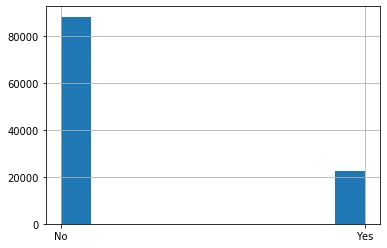

In [22]:
len_df = df.shape[0]
present = df[df['Present'] == 'Yes']
absent = df[df['Present'] == 'No']

print('Present :',(len(present)/len_df)*100,'%')
print('Absent :',(len(absent)/len_df)*100,'%')

(df['Present']).hist()

### Just 20% showed-up on the appointment day while Almost 80% patient did not show-up

## Separating Categorical data from Numerical data
Separating the 2 main types of dataset for distribution plot of features at once

In [23]:
num_data = df.select_dtypes(exclude = 'object')
cat_data = df.select_dtypes(include = 'object')

num_data.drop( 'AppointmentID', axis = 1, inplace = True)
cat_data.drop( 'PatientId', axis = 1, inplace = True)

C:\Users\ICT\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


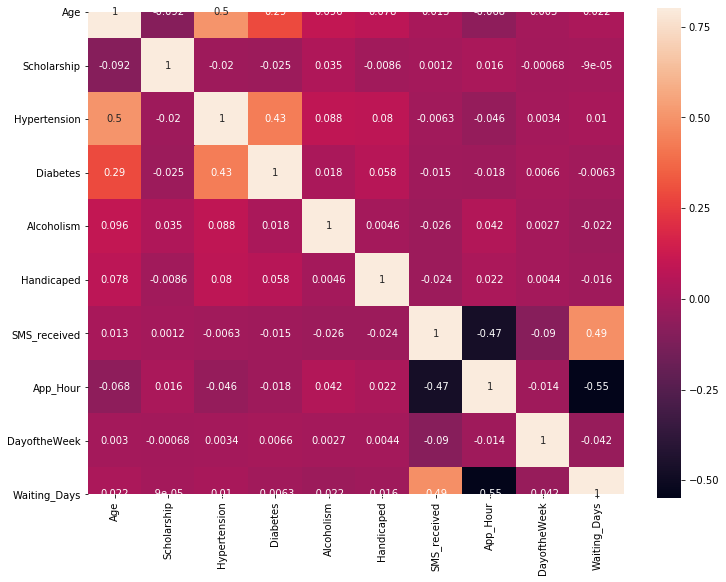

In [24]:
# heat map of correlation of numeric features
correlation_matrix = num_data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot = True)
plt.show()

### Checking for distributions in numerical data

Let’s plot the distribution of numerical features with pairplot


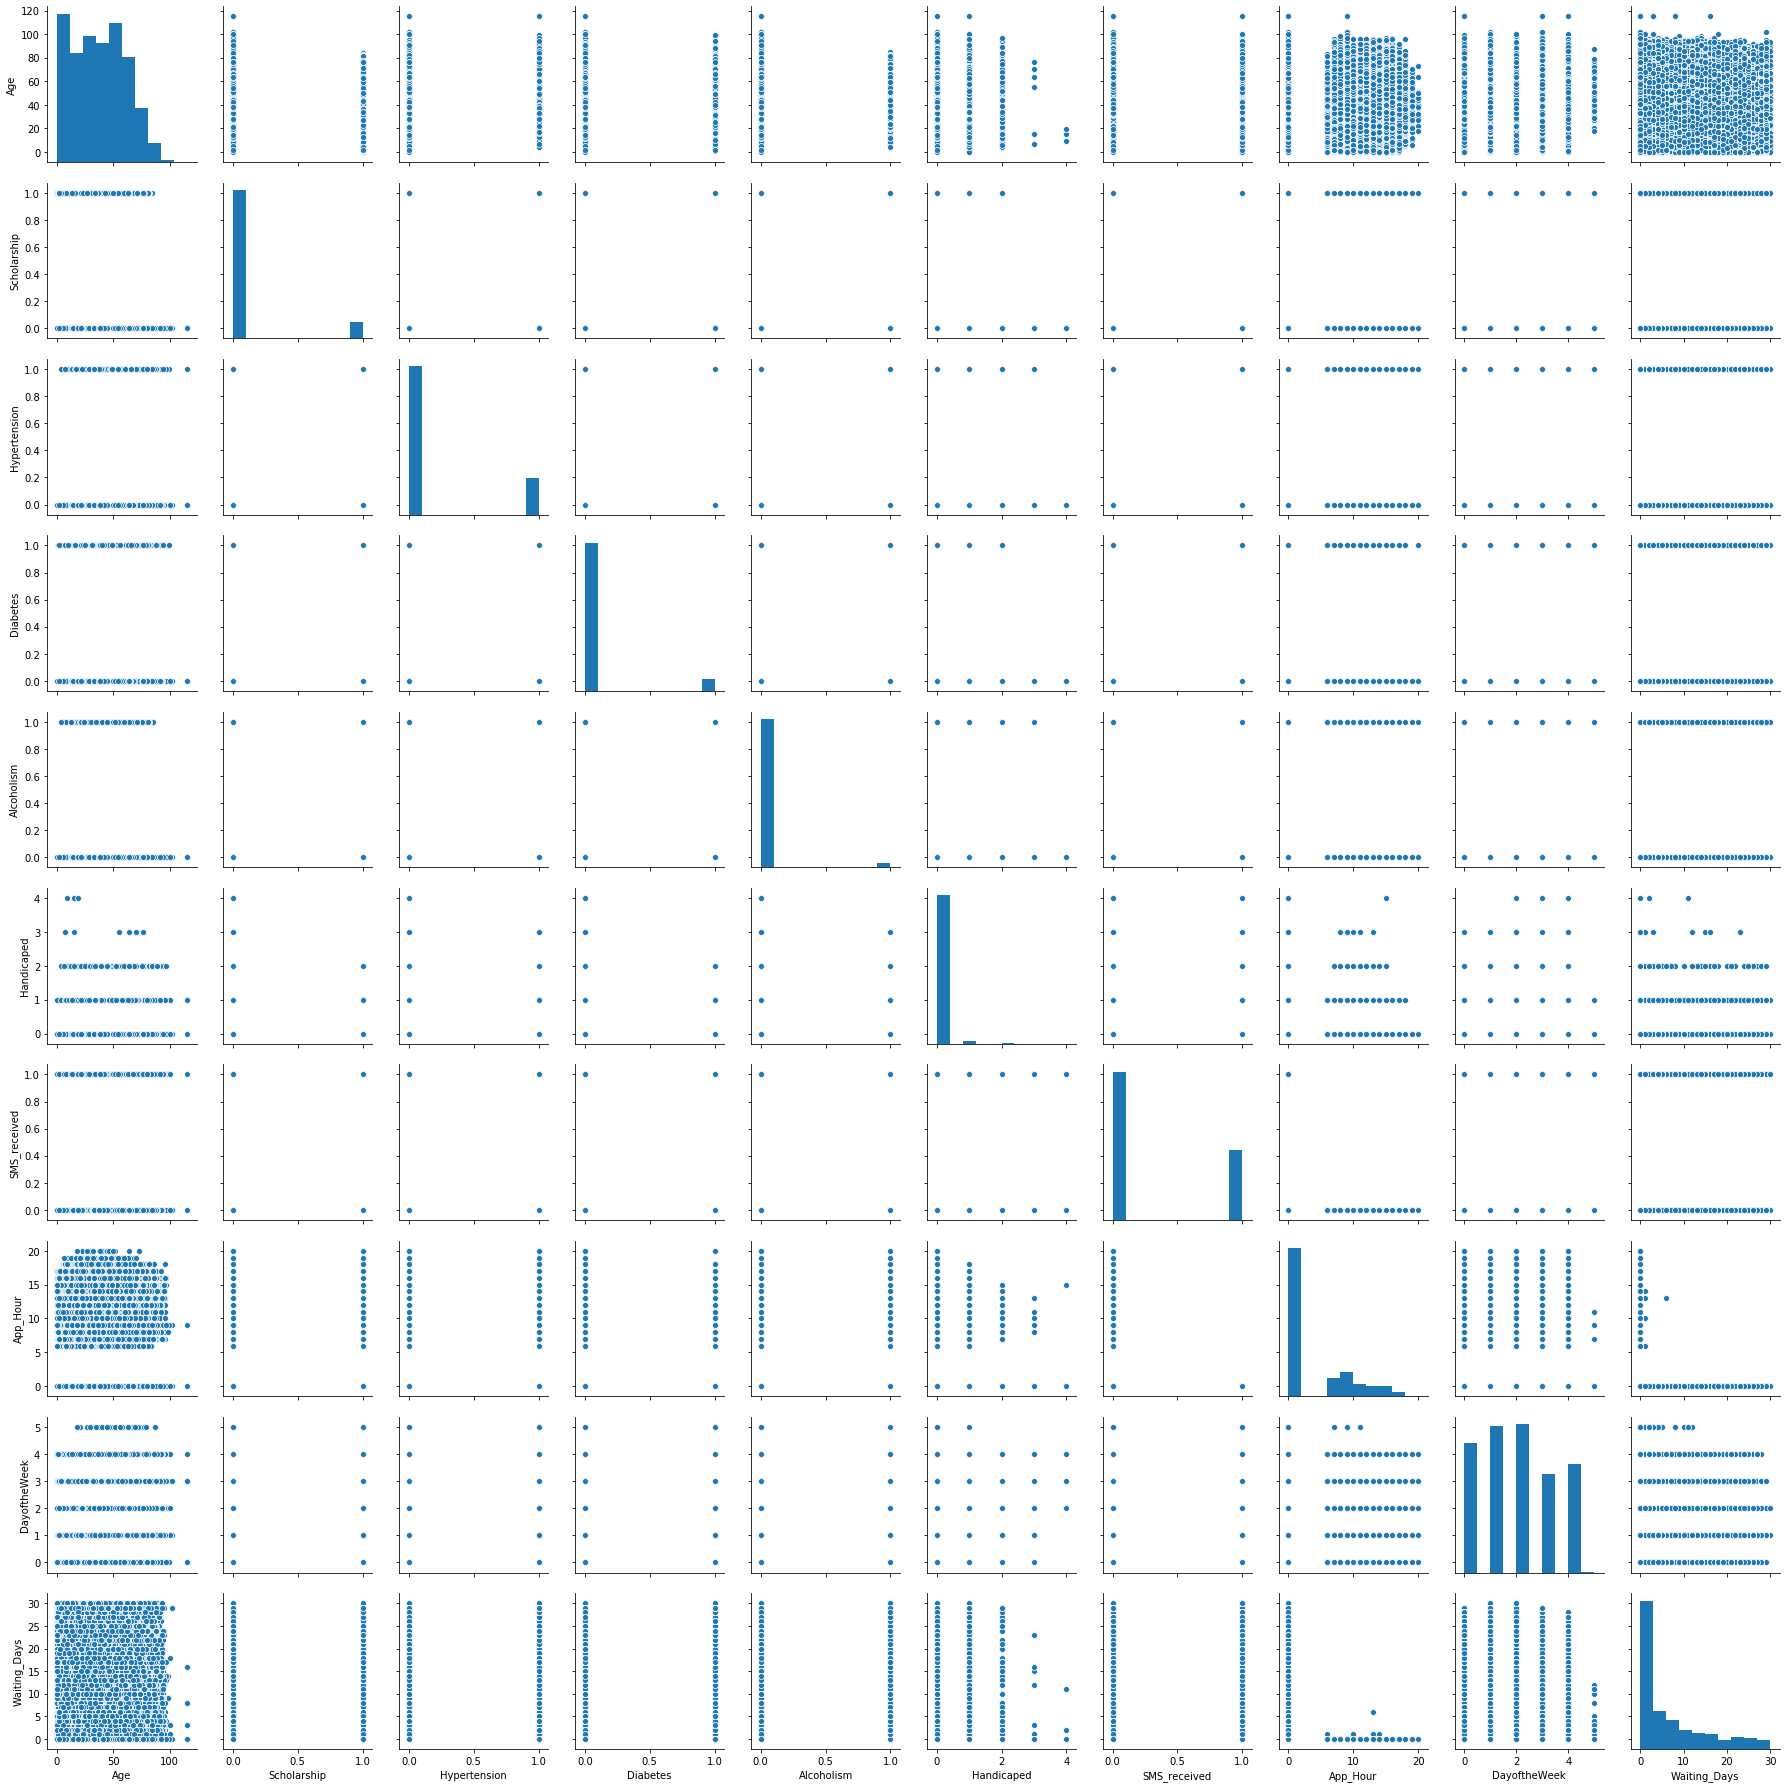

In [26]:
sns.pairplot(num_data)

### Checking for distributions in Categorical data

Let’s plot the distribution of categorical features

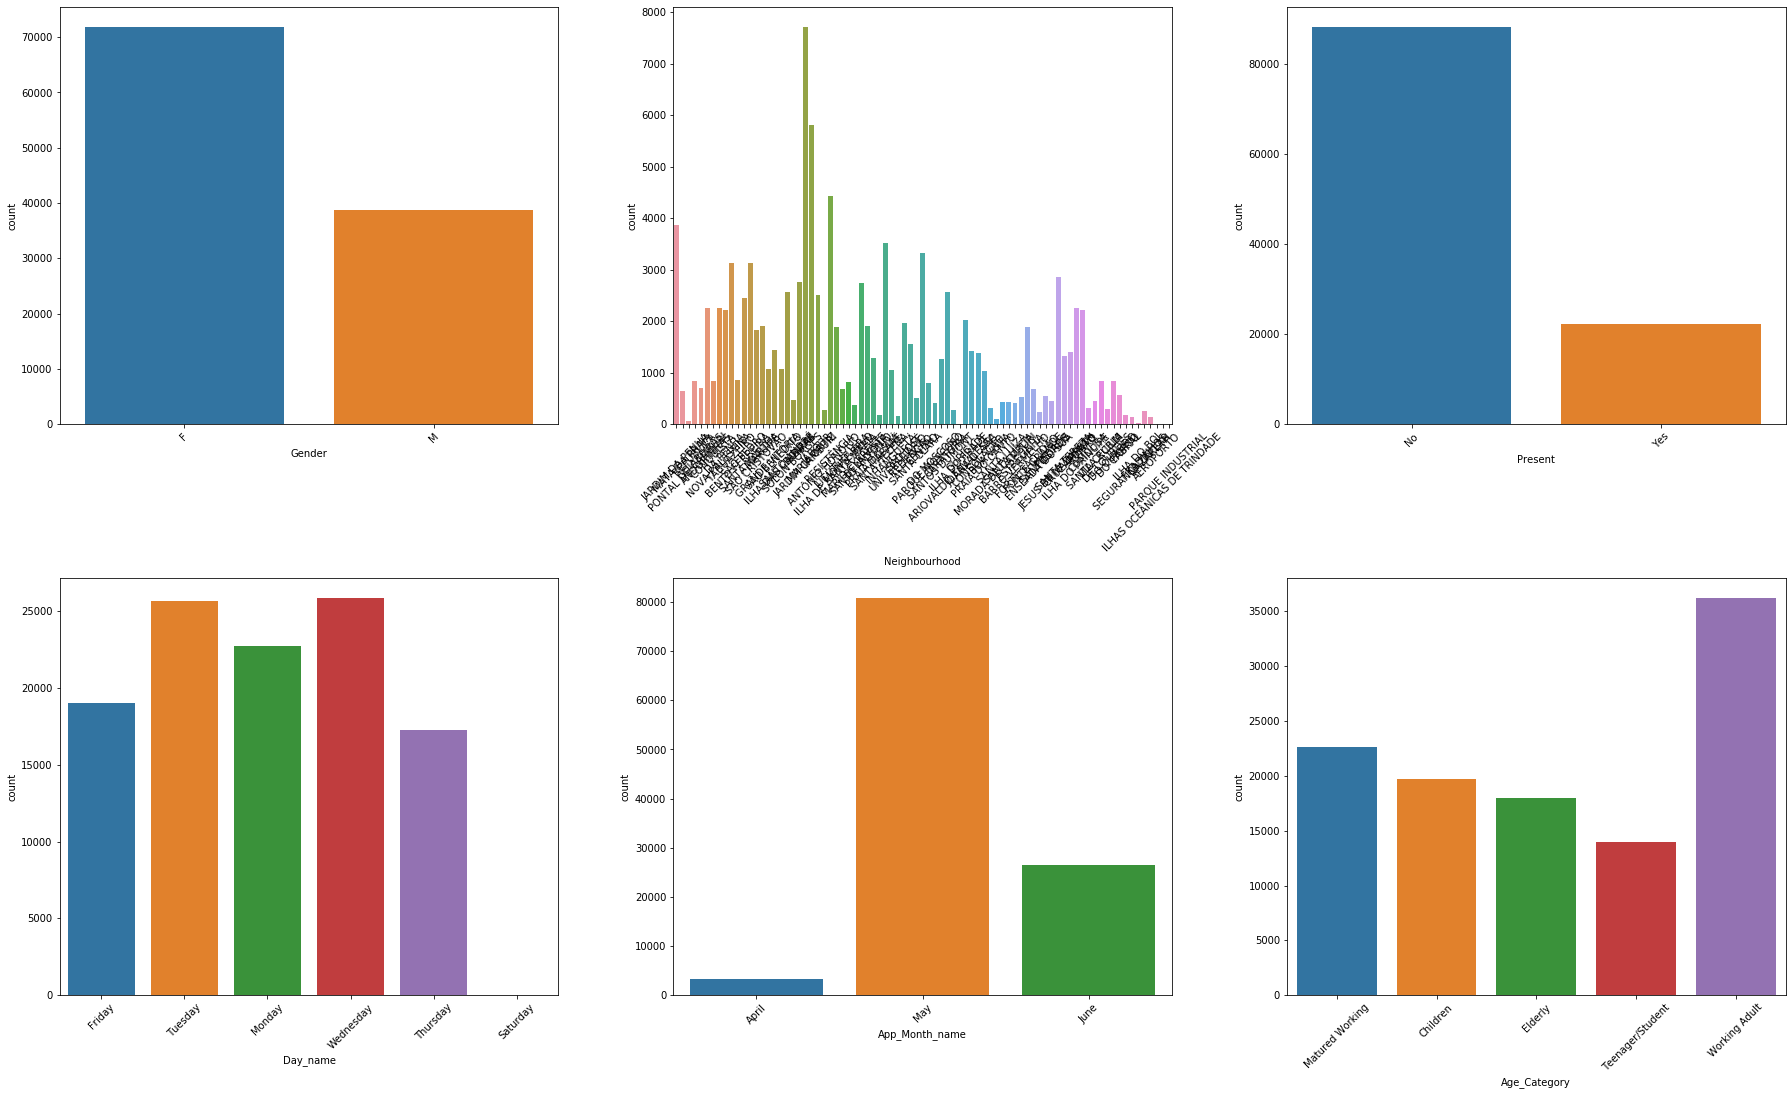

In [27]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(25, 15))
for variable, subplot in zip(cat_data, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

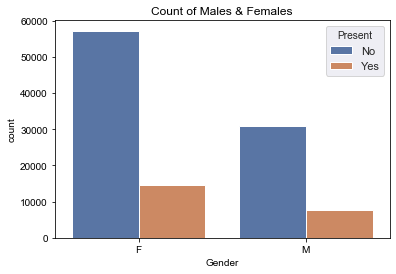

In [28]:
#Count of males & females scheduled for appointment
plt.title('Count of Males & Females')
sns.set(style="darkgrid")
sns.countplot(x = 'Gender', hue='Present', data = df)

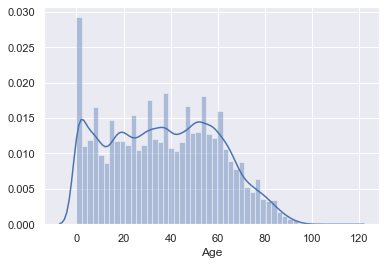

In [29]:
#Age distribution of patients in the dataset
sns.distplot(df['Age'])

In [33]:
(df['Age_Category'].value_counts())

Working Adult       36223
Matured Working     22634
Children            19718
Elderly             17941
Teenager/Student    14010
Name: Age_Category, dtype: int64

[Text(0, 0, 'Matured Working'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'Elderly'),
 Text(0, 0, 'Teenager/Student'),
 Text(0, 0, 'Working Adult')]

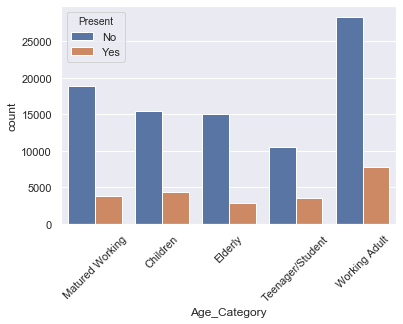

In [34]:
ax = sns.countplot('Age_Category', hue='Present', data = df)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45,)

From common experience, we know that appointments for patients younger than 14, are actually done by their parents. We can see how, as kids grow older, the parents tend to miss more appointments

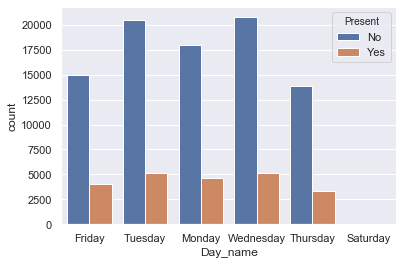

In [36]:
sns.countplot('Day_name', hue = 'Present', data = df)

# Encoding Categorical Values

Select a suitable encoding method and the data to be transformed

In [37]:
#Encoding features one by one, then concatenate 
enc_Present = pd.get_dummies(df['Present'], drop_first = True)
Enc_Gender = pd.get_dummies(df['Gender'], drop_first = True)     


In [38]:
#Encoding features all at once

cat_2_dum = []
for col in cat_data.columns:
    #print(pd.DataFrame(cat_data[col]).columns, ':', len((cat_data[col].value_counts())))
    if len((cat_data[col].value_counts())) <= 3:
        print(cat_data[col].value_counts())
        cat_2_dum.append(col) 
        cat_encoded = pd.get_dummies(cat_data[cat_2_dum], drop_first=True)
cat_encoded

F    71839
M    38687
Name: Gender, dtype: int64
No     88207
Yes    22319
Name: Present, dtype: int64
May      80841
June     26450
April     3235
Name: App_Month_name, dtype: int64


,Gender_M,Present_Yes,App_Month_name_June,App_Month_name_May
0,0,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
110522,0,0,1,0
110523,0,0,1,0
110524,0,0,1,0
110525,0,0,1,0


In [39]:
final_df = pd.concat([cat_encoded,num_data],axis=1)

# Other Premodeling steps are

* Scaling and Normalization

* Train_test_split

## About Me
### Olasunkanmi Roseline Olawumi
#### Program Assistant,
![DataSN](img/DSN.jpg)

